# Simple Harmonic Motion
## Analysis of Multiple Fits

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit
# Set the number of digits to be printed after the decimal point
np.set_printoptions(precision=4)

If running on Google Colab, can use google drive for the data and mount the drive. Note this example assumes the file is in the same directly as the notebook default "Colab Notebooks", if you are working in a different directory you will need to adjust the path accordingly.

In [9]:
#if working on colab, put the data in the same directory and mount the drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [10]:
df = pd.read_csv("100g_Damped_20runs.csv")
plot_title = 'mass = 100g with damper'

Check that the format of the file is as expected, the top row should contain the title of the column, for example: "Time (s) Run #1", "Position (m) Run #1", etc. The columns of interest are Time and Position and if you have multiple runs in the file these should correspond to different run numbers. *This example expects 20 runs in the input file.*

In [11]:
df.head()

,Time (s) Run #1,Position (m) Run #1,Velocity (m/s) Run #1,Acceleration (m/s²) Run #1,Time (s) Run #2,Position (m) Run #2,Velocity (m/s) Run #2,Acceleration (m/s²) Run #2,Time (s) Run #3,Position (m) Run #3,...,Velocity (m/s) Run #18,Acceleration (m/s²) Run #18,Time (s) Run #19,Position (m) Run #19,Velocity (m/s) Run #19,Acceleration (m/s²) Run #19,Time (s) Run #20,Position (m) Run #20,Velocity (m/s) Run #20,Acceleration (m/s²) Run #20
0,0.00,0.91,NaN,NaN,0.00,0.99,NaN,NaN,0.00,0.75,...,NaN,NaN,0.00,0.73,NaN,NaN,0.00,0.96,NaN,NaN
1,0.05,0.97,1.03,NaN,0.05,1.03,0.70,NaN,0.05,0.70,...,0.59,NaN,0.05,0.68,-0.89,NaN,0.05,1.01,0.91,NaN
2,0.10,1.02,0.76,-5.63,0.10,1.06,0.39,-6.24,0.10,0.66,...,0.25,-7.05,0.10,0.65,-0.63,5.14,0.10,1.05,0.60,-6.08
3,0.15,1.05,0.47,-5.87,0.15,1.07,0.08,-6.11,0.15,0.63,...,-0.11,-7.22,0.15,0.62,-0.37,5.37,0.15,1.07,0.30,-6.18
4,0.20,1.06,0.16,-5.90,0.20,1.07,-0.23,-5.83,0.20,0.61,...,-0.49,-6.86,0.20,0.61,-0.10,5.53,0.20,1.08,-0.01,-6.34


## Reminder on how to obtain fit values and uncertainties using Scipy curve_fit
#### Documentation at https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#### More information about curve fitting at https://python4mpia.github.io/fitting_data/least-squares-fitting.html
#### First define a damped sine function
### $$A e^{-Bt} \sin(Wt+P) + C$$
Parameters are: amplitude (A), damping (B), frequency (W), phase (P) and offset (C)

In [12]:
def my_sin(x, amplitude, damp, freq, phase, offset):
    return amplitude * np.exp(-damp * x) * np.sin(x * freq + phase) + offset


### Statistical analysis of the fit results of 20 repeated experiments
Perform fit from first to last specified data point. Note that data is collected at 20 Hz, i.e. a new position measurement is made every 50 ms.

For the position measurement error, the Pasco motion sensor has resolution of 1 mm.

Store the fit parameters in an array.



In [ ]:
A = []
B = []
W = []
P = []
C = []

guess_damp = 0.01
guess_freq = 5
guess_phase = -3

# first and last points used in the fit
first = 0
last = first+600

for i in range(20):
  x=df["Time (s) Run #"+str(i+1)].dropna()
  x=x.to_numpy()
  x=x.transpose()
  y=df["Position (m) Run #"+str(i+1)].dropna()
  y=y.to_numpy()
  y=y.transpose()

  guess_amplitude = np.max(y)-np.mean(y)
  guess_offset = np.mean(y)
  p0_guess=[guess_amplitude, guess_damp, guess_freq, guess_phase, guess_offset]

  dy = np.full(len(x),0.001)
  fit = curve_fit(my_sin, x[first:last], y[first:last], sigma=dy[first:last], p0=p0_guess, absolute_sigma=True)

  # Extract fit results: parameters
  param = fit[0]
  A.append(param[0])
  B.append(param[1])
  W.append(param[2])
  P.append(param[3])
  C.append(param[4])

### Histogram the measurements
Specify which parameter to plot and the axis label. *Don't forget to add the units.*

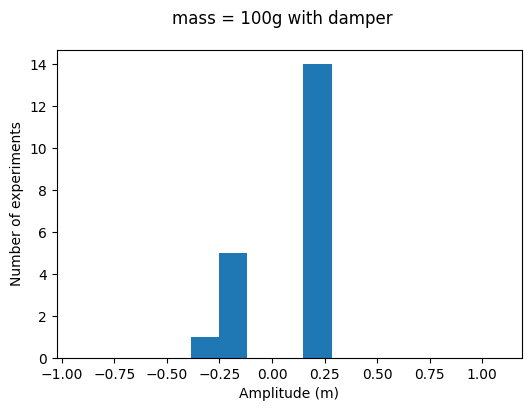

Avg   0.082935 +/- 0.045, std dev 0.201


In [14]:
plt.figure(figsize=(6,4))
# Specify which parameter to plot and the axis label
parameter = A
label_title = 'Amplitude (m)'

lowx = np.mean(parameter)-5*np.std(parameter)
highx = np.mean(parameter)+5*np.std(parameter)
plt.hist(parameter, bins=15, range=(lowx, highx))
plt.xlabel(label_title)
plt.ylabel('Number of experiments')
plt.suptitle(plot_title)
plt.show()
print('Avg   ' + "{:.5}".format(np.mean(parameter)) + " +/- " + "{:.2}".format(np.std(parameter)/np.sqrt(len(parameter))) + ", std dev " + "{:.3}".format(np.std(parameter)))